In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [69]:
games = pd.read_csv("clean_games_with_franchises.csv", index_col = 0)
movies = pd.read_csv("movies_with_franchises.csv", index_col = 0)

D:\Programs\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
Get the number of movies/games in a franchise, vs the number not in a franchise.

## Initial analysis

In [ ]:
Check how mnay of our games and movies are in a franchise and how many are not. 

In [109]:
games.tconst.count()

16990

In [110]:
games.tconst.nunique()

14384

In [114]:
games[~games["franchise_id"].isna()].tconst.nunique()

8603

In [112]:
games[games["franchise_id"].isna()].tconst.count()

5781

<BarContainer object of 2 artists>

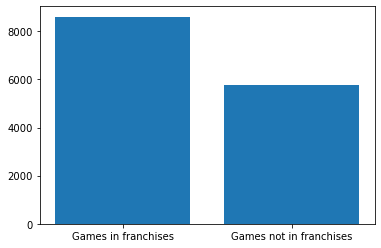

In [122]:
plt.bar(["Games in franchises", "Games not in franchises"], [games[~games["franchise_id"].isna()].tconst.nunique(), games[games["franchise_id"].isna()].tconst.count()])

In [115]:
movies.tconst.count()

290738

In [116]:
movies.tconst.nunique()

290239

In [117]:
movies[~movies["franchise_id"].isna()].tconst.nunique()

7375

In [118]:
movies[movies["franchise_id"].isna()].tconst.count()

282864

<BarContainer object of 2 artists>

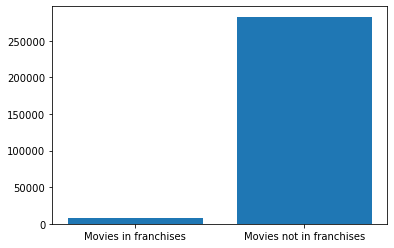

In [123]:
plt.bar(["Movies in franchises", "Movies not in franchises"], [movies[~movies["franchise_id"].isna()].tconst.nunique(), movies[movies["franchise_id"].isna()].tconst.count()])

In [95]:
games.groupby("franchise_id").count()

,franchise_name,tconst,titleType,primaryTitle,startYear,isAdult,averageRating,numVotes,game_id,best_fit_ratio,genres,developers,platforms,publishers,rating
franchise_id,,,,,,,,,,,,,,,
3025-1,195,195,195,195,195,195,195,195,195,195,195,195,195,195,153
3025-10,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
3025-100,8,8,8,8,8,8,8,8,8,8,8,8,8,8,1
3025-1000,10,10,10,10,10,10,10,10,10,10,10,10,10,10,7
3025-1007,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025-99,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9
3025-993,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
3025-994,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [90]:
games

,franchise_name,franchise_id,tconst,titleType,primaryTitle,startYear,isAdult,averageRating,numVotes,game_id,best_fit_ratio,genres,developers,platforms,publishers,rating
0,NaN,NaN,tt0084376,videoGame,"MysteryDisc: Murder, Anyone?",1982,0,6.1,37.0,NaN,90.0,"['Adventure', 'Crime', 'Mystery']",NaN,NaN,NaN,NaN
1,NaN,NaN,tt0105000,videoGame,Night Trap,1992,0,6.2,376.0,NaN,85.5,"['Adventure', 'Horror', 'Mystery']",NaN,NaN,NaN,NaN
2,Gabriel Knight,3025-638,tt0109865,videoGame,Gabriel Knight: Sins of the Fathers,1993,0,9.1,706.0,7821.0,100.0,"['Adventure', 'Horror', 'Drama']","['Sierra', 'Phoenix Online Studios', 'Pinkerto...","['Mac', 'PC', 'iPhone', 'iPad', 'Android']","['Sierra', 'Pinkerton Road Studio']",['ESRB: T']
3,King's Quest,3025-413,tt0110267,videoGame,King's Quest VII: The Princeless Bride,1994,0,7.6,206.0,10917.0,100.0,"['Adventure', 'Fantasy']",['Sierra'],"['Mac', 'PC']",['Sierra'],"['ESRB: E', 'ESRB: K-A', 'ESRB: T']"
4,NaN,NaN,tt0110909,videoGame,Psychic Detective,1995,0,8.5,50.0,NaN,90.0,"['Adventure', 'Mystery', 'Fantasy']",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16985,NaN,NaN,tt9888864,videoGame,Infernal,2007,0,6.0,17.0,NaN,90.0,['Action'],NaN,NaN,NaN,NaN
16986,NaN,NaN,tt9892552,videoGame,Spiral Splatter,2017,0,2.0,10.0,NaN,85.5,['Action'],NaN,NaN,NaN,NaN
16987,NaN,NaN,tt9893348,videoGame,Alien: Covenant In Utero VR Experience,2017,0,6.2,17.0,NaN,90.0,['Sci-Fi'],NaN,NaN,NaN,NaN
16988,LEGO,3025-448,tt9893804,videoGame,The Lego Movie 2 Videogame,2019,0,5.5,156.0,22035.0,100.0,"['Animation', 'Adventure', 'Family', 'Action-A...",['TT Games'],"['PC', 'Xbox One', 'PlayStation 4', 'Nintendo ...",['WB Games'],NaN


In [3]:
games

,franchise_name,franchise_id,tconst,titleType,primaryTitle,startYear,isAdult,averageRating,numVotes,game_id,best_fit_ratio,genres,developers,platforms,publishers,rating
0,NaN,NaN,tt0084376,videoGame,"MysteryDisc: Murder, Anyone?",1982,0,6.1,37.0,NaN,90.0,"['Adventure', 'Crime', 'Mystery']",NaN,NaN,NaN,NaN
1,NaN,NaN,tt0105000,videoGame,Night Trap,1992,0,6.2,376.0,NaN,85.5,"['Adventure', 'Horror', 'Mystery']",NaN,NaN,NaN,NaN
2,Gabriel Knight,3025-638,tt0109865,videoGame,Gabriel Knight: Sins of the Fathers,1993,0,9.1,706.0,7821.0,100.0,"['Adventure', 'Horror', 'Drama']","['Sierra', 'Phoenix Online Studios', 'Pinkerto...","['Mac', 'PC', 'iPhone', 'iPad', 'Android']","['Sierra', 'Pinkerton Road Studio']",['ESRB: T']
3,King's Quest,3025-413,tt0110267,videoGame,King's Quest VII: The Princeless Bride,1994,0,7.6,206.0,10917.0,100.0,"['Adventure', 'Fantasy']",['Sierra'],"['Mac', 'PC']",['Sierra'],"['ESRB: E', 'ESRB: K-A', 'ESRB: T']"
4,NaN,NaN,tt0110909,videoGame,Psychic Detective,1995,0,8.5,50.0,NaN,90.0,"['Adventure', 'Mystery', 'Fantasy']",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16985,NaN,NaN,tt9888864,videoGame,Infernal,2007,0,6.0,17.0,NaN,90.0,['Action'],NaN,NaN,NaN,NaN
16986,NaN,NaN,tt9892552,videoGame,Spiral Splatter,2017,0,2.0,10.0,NaN,85.5,['Action'],NaN,NaN,NaN,NaN
16987,NaN,NaN,tt9893348,videoGame,Alien: Covenant In Utero VR Experience,2017,0,6.2,17.0,NaN,90.0,['Sci-Fi'],NaN,NaN,NaN,NaN
16988,LEGO,3025-448,tt9893804,videoGame,The Lego Movie 2 Videogame,2019,0,5.5,156.0,22035.0,100.0,"['Animation', 'Adventure', 'Family', 'Action-A...",['TT Games'],"['PC', 'Xbox One', 'PlayStation 4', 'Nintendo ...",['WB Games'],NaN


In [ ]:
Get total number of franchises and how many games in each franchise

In [ ]:
plt.plot(x, y1, label='Line 1')
plt.plot(x, y2, label='Line 2')

<AxesSubplot:>

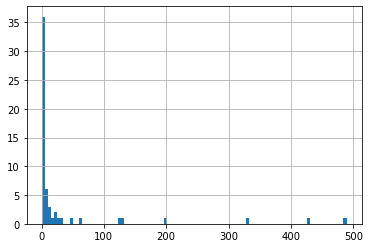

In [49]:
games.groupby("franchise_id")["game_id"].count().value_counts().hist(bins = 100)

In [28]:
games.franchise_id.nunique()

2073

In [50]:
franchise_counts = games.groupby('franchise_id')['game_id'].count()
single_game_franchises = franchise_counts[franchise_counts <= 2].index
result = games.loc[~games['franchise_id'].isin(single_game_franchises)]


In [88]:
total = 0
for x in movies_counts:
    total += x
print(total)

7874


In [89]:
total = 0
for x in games_counts:
    total += x
print(total)

11209


In [86]:
print(list(movies_counts))

[0, 0, 0, 0, 0, 4, 5, 2, 3, 6, 3, 5, 7, 2, 10, 4, 12, 19, 15, 20, 15, 25, 21, 26, 25, 42, 39, 67, 41, 54, 56, 62, 81, 93, 90, 104, 117, 92, 117, 112, 123, 138, 187, 199, 200, 200, 256, 249, 292, 258, 294, 296, 353, 317, 306, 319, 290, 232, 255, 203, 212, 168, 207, 159, 128, 109, 94, 72, 69, 61, 38, 46, 29, 17, 22, 11, 17, 12, 13, 6, 5, 4, 6, 2, 1, 1, 2, 0, 0, 0, 0]


In [85]:
print(list(games_counts))

[0, 0, 2, 1, 2, 1, 2, 5, 3, 2, 1, 8, 4, 4, 4, 3, 8, 2, 9, 11, 13, 10, 14, 12, 19, 15, 10, 24, 16, 24, 27, 40, 21, 44, 39, 50, 33, 46, 25, 64, 61, 115, 107, 108, 135, 123, 150, 179, 137, 192, 212, 267, 271, 302, 279, 331, 298, 384, 343, 420, 448, 439, 444, 496, 451, 462, 420, 453, 381, 342, 302, 307, 265, 186, 193, 143, 74, 89, 57, 66, 48, 42, 16, 25, 19, 4, 4, 1]


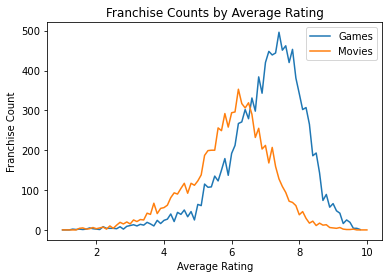

In [79]:

# group by averageRating and count the number of franchise_ids for games and movies
games_counts = games.groupby("averageRating")["franchise_id"].count()
movies_counts = movies.groupby("averageRating")["franchise_id"].count()

# plot the counts for games and movies on the same graph
plt.plot(games_counts.index, games_counts.values, label='Games')
plt.plot(movies_counts.index, movies_counts.values, label='Movies')

# add a legend, title, and axis labels
plt.legend()
plt.title('Franchise Counts by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Franchise Count')

# show the plot
plt.show()


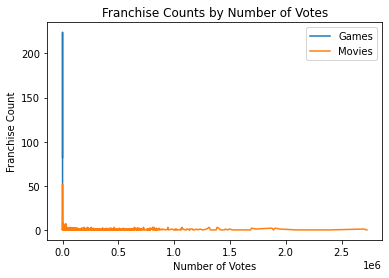

In [77]:

# group by number of votes and count the number of franchise_ids for games and movies
games_counts = games.groupby("numVotes")["franchise_id"].count()
movies_counts = movies.groupby("numVotes")["franchise_id"].count()

# plot the counts for games and movies on the same graph
plt.plot(games_counts.index, games_counts.values, label='Games')
plt.plot(movies_counts.index, movies_counts.values, label='Movies')

# add a legend, title, and axis labels
plt.legend()
plt.title('Franchise Counts by Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Franchise Count')

# show the plot
plt.show()

<AxesSubplot:xlabel='averageRating'>

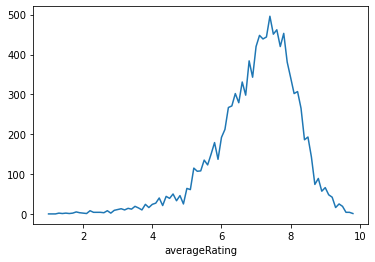

In [66]:
games.groupby("averageRating")["franchise_id"].count().plot()

<AxesSubplot:xlabel='averageRating'>

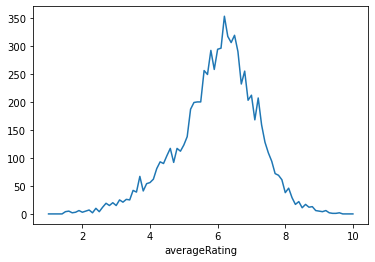

In [72]:
movies.groupby("averageRating")["franchise_id"].count().plot()

<AxesSubplot:>

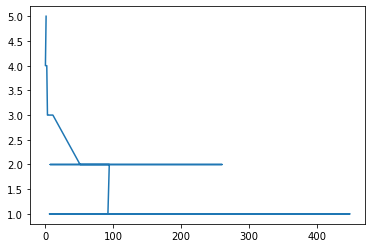

In [58]:
result.groupby("averageRating")["game_id"].count().value_counts().plot()

<AxesSubplot:>

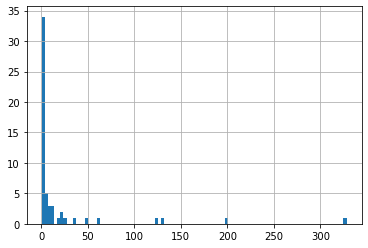

In [53]:
result.groupby("franchise_id")["franchise_id"].count().value_counts().hist(bins = 100)